# Binary Image Processing
###### by: João Ataíde
---

In [1]:
#Importando as bibliotecas
import cv2, time
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

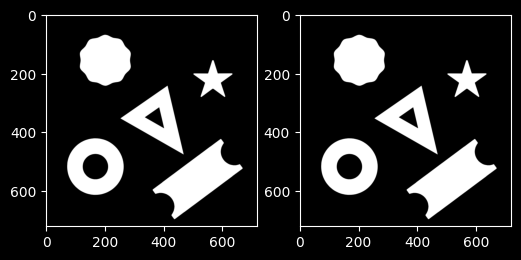

In [15]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w3 - Binary Image Processing\data"

imagePath = f"{DATA_PATH}\\images\\Contour.png"
im = cv2.imread(imagePath)
imGray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.subplot(121)
plt.imshow(im[:,:,::-1]);
plt.subplot(122)
plt.imshow(imGray);

## Drawing Contours

In [17]:
contours, hierarchy = cv2.findContours(imGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [18]:
print(f"Number of contours: {len(contours)}")
print(f"Hierarchy: \n {hierarchy}")

Number of contours: 7
Hierarchy: 
 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [-1  5 -1 -1]]]


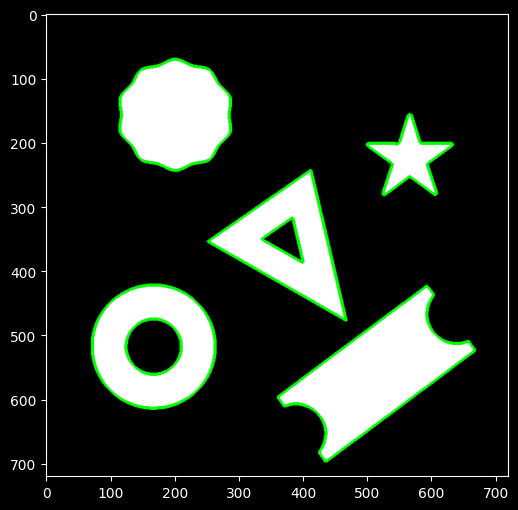

In [19]:
image = im.copy()
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image[:,:,::-1]);

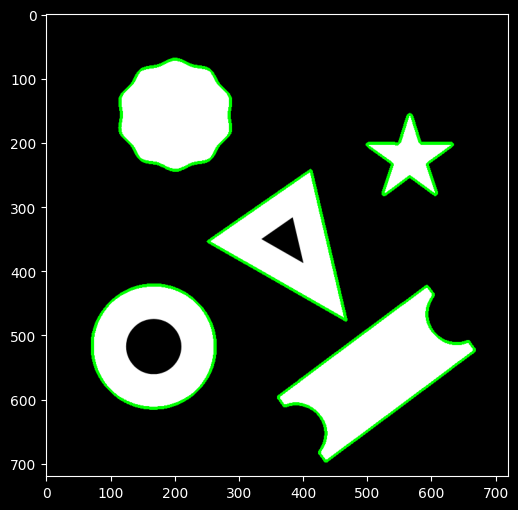

In [20]:
image = im.copy()
contours, hierarchy = cv2.findContours(imGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image[:,:,::-1]);

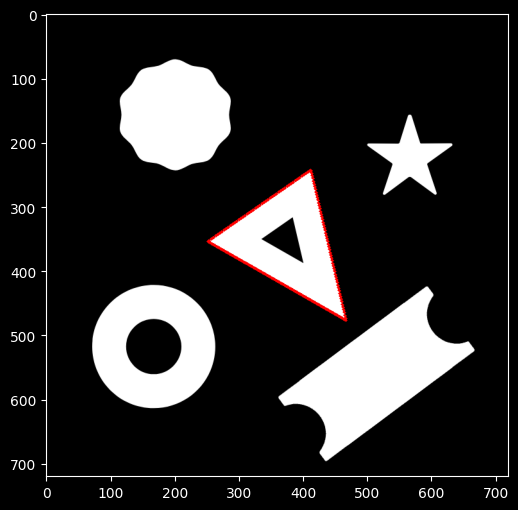

In [23]:
image = im.copy()
cv2.drawContours(image, contours[2], -1, (0, 0, 255), 3)
plt.imshow(image[:,:,::-1]);

## Contour Properties

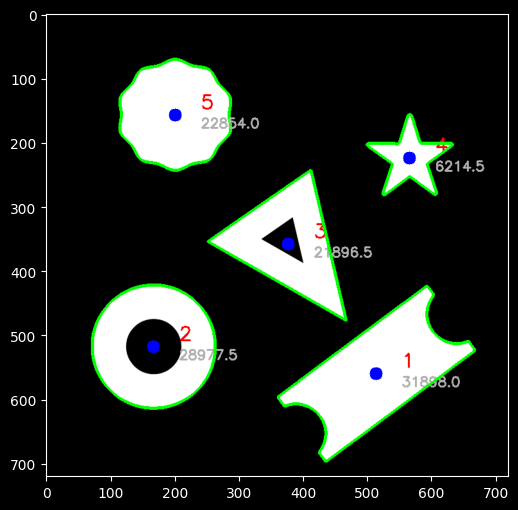

In [73]:
image = im.copy()
for index, cnt in enumerate(contours):
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))

    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)

    cv2.circle(image, (x,y), 10, (255, 0, 0), -1);

    contours, hierarchy = cv2.findContours(imGray, cv2.RETR_EXTERNAL,
                                           cv2.CHAIN_APPROX_SIMPLE)

    cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

    cv2.putText(image, f"{area}",  (x + 40, y + 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (175,175,175), 2)


    cv2.putText(image, f"{index + 1}",  (x + 40, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)


plt.imshow(image[:,:,::-1]);

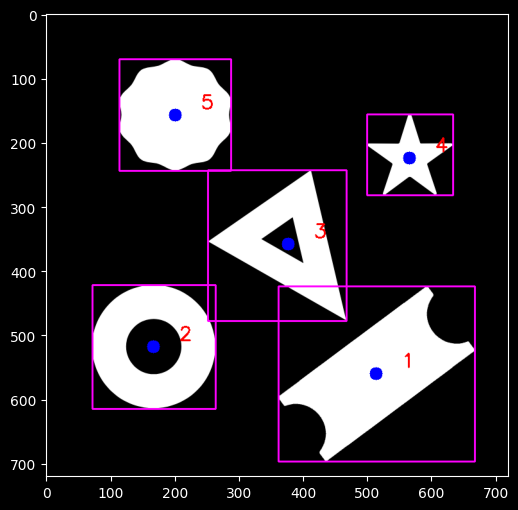

In [74]:
image = im.copy()
for index, cnt in enumerate(contours):
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))

    cv2.circle(image, (x,y), 10, (255, 0, 0), -1);

    cv2.putText(image, f"{index + 1}",  (x + 40, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(image, (x,y), (x + w, y + h),
                  (255, 0, 255), 2)

plt.imshow(image[:,:,::-1]);

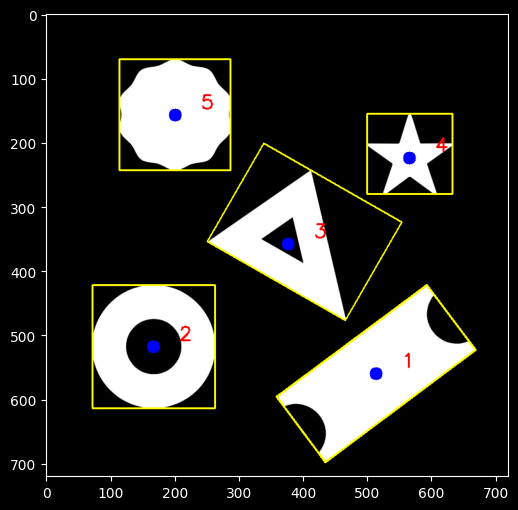

In [75]:
image = im.copy()
for index, cnt in enumerate(contours):
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))

    cv2.circle(image, (x,y), 10, (255, 0, 0), -1);

    cv2.putText(image, f"{index + 1}",  (x + 40, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    box = cv2.minAreaRect(cnt)
    boxPts = np.int0(cv2.boxPoints(box))

    cv2.drawContours(image, [boxPts], -1,
                     (0,255,255), 2)

plt.imshow(image[:,:,::-1]);

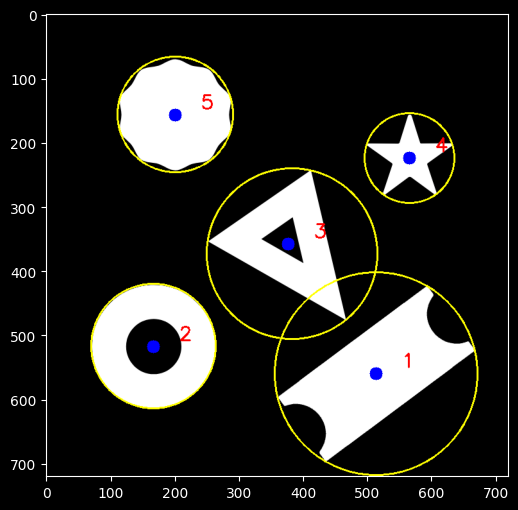

In [79]:
image = im.copy()
for index, cnt in enumerate(contours):
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))

    cv2.circle(image, (x,y), 10, (255, 0, 0), -1);

    cv2.putText(image, f"{index + 1}",  (x + 40, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    ((x, y), radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(image, (int(x), int(y)), int(round(radius)),
               (0,255,255), 2)

plt.imshow(image[:,:,::-1]);

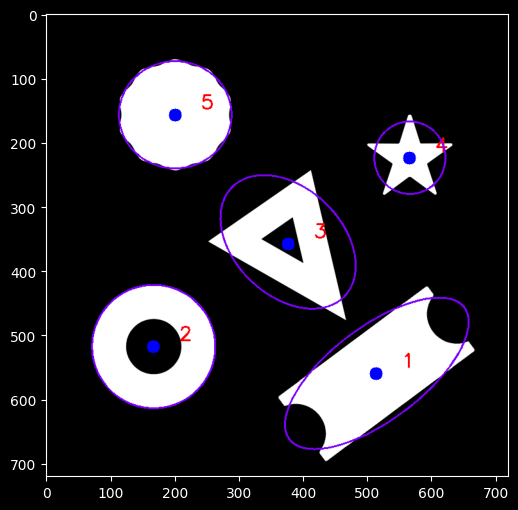

In [80]:
image = im.copy()
for index, cnt in enumerate(contours):
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))

    cv2.circle(image, (x,y), 10, (255, 0, 0), -1);

    cv2.putText(image, f"{index + 1}",  (x + 40, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(image, ellipse, (255, 0, 125), 2)

plt.imshow(image[:,:,::-1]);

https://docs.opencv.org/4.1.0/d3/d05/tutorial_py_table_of_contents_contours.html
https://pysource.com/2018/03/01/find-and-draw-contours-opencv-3-4-with-python-3-tutorial-19/
https://www.youtube.com/watch?v=B5rDP0x_s8c
https://www.youtube.com/watch?v=OAjvqt-UVM8